In [203]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
import seaborn as sns

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

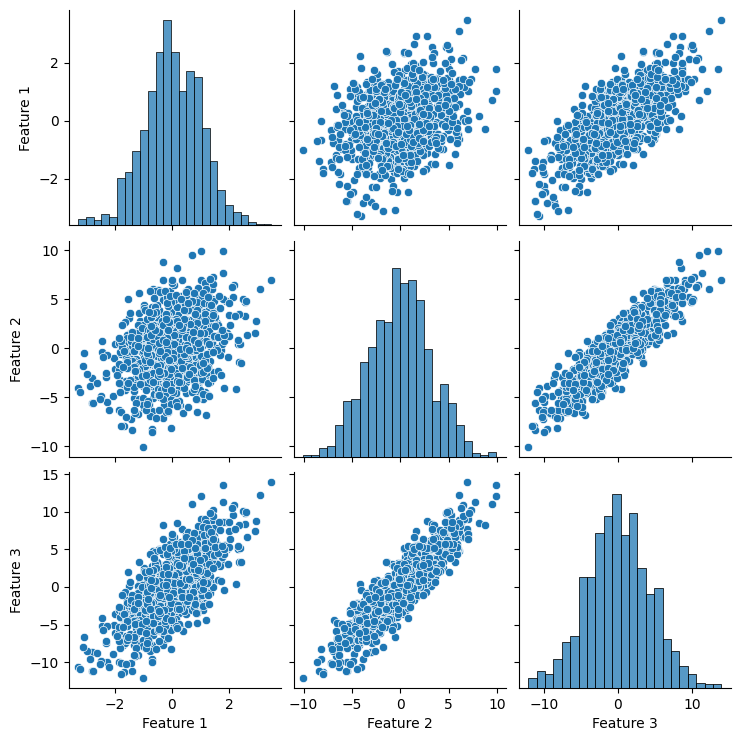

In [315]:
n = 1000
m = 3

np.random.seed(390)

x0 = np.random.normal(0,1,n)
x1 = x1 + np.random.normal(0,3,n)
x2 = 2*x1 + x2

X = np.column_stack((x1, x2, x3))

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
sns.pairplot(df)

In [317]:
print("-------------------------------------------------------------------------------")
print("Eigenvalues and eigenvectors using eigendecomposition of the covariance matrix")
print("-------------------------------------------------------------------------------\n")

cov = np.cov(X, rowvar=False)
print("Covariance matrix:\n", cov, '\n')

l_cov, V = la.eig(cov)
l_cov = np.real_if_close(l_cov)

print("Eigenvalues:\n", l_cov, '\n')
print("Eigenvectors:\n", V, '\n')

print("---------------------------------------------------------")
print("Eigen values and vectors using SVD")
print("---------------------------------------------------------\n")

U, s, Vt = la.svd(X)

print("s:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

l_svd = s**2/(n-1)

print("---------------------------------------------------------")
print("Eigendecomposition and SVD comparison")
print("---------------------------------------------------------\n")

print("Eigenvalues:\n")
print("Eigendecomposition: ", l)
print("SVD: ", l_svd)

print("\nEigenvectors:\n")
print("Eigendecomposition:\n", V)
print("SVD:\n", Vt.T)

# Second and third eigenvalue (eigenvector) are swapped in the two methods but the results are approximately the same

-------------------------------------------------------------------------------
Eigenvalues and eigenvectors using eigendecomposition of the covariance matrix
-------------------------------------------------------------------------------

Covariance matrix:
 [[ 1.0262001   1.05102763  3.10342782]
 [ 1.05102763 10.13712922 12.23918448]
 [ 3.10342782 12.23918448 18.44604013]] 

Eigenvalues:
 [2.75871065e+01 2.65720643e-15 2.02226295e+00] 

Eigenvectors:
 [[-0.11735973 -0.81649658  0.56529641]
 [-0.57498414 -0.40824829 -0.70903214]
 [-0.80970361  0.40824829  0.42156067]] 

---------------------------------------------------------
Eigen values and vectors using SVD
---------------------------------------------------------

s:
 [1.66010617e+02 4.49594287e+01 3.72044262e-14] 

U:
 [[-1.90144971e-02  8.78585517e-03  9.28787409e-01 ...  5.22178284e-03
  -2.77636605e-03  1.41706737e-02]
 [-3.10290595e-02 -1.24473082e-02 -3.42611331e-01 ...  2.25789869e-02
  -5.58658857e-03  4.09311122e-02]
 [ 

In [318]:
# Total variability
Lambda = np.diag(l_svd)
print("\nLambda:\n", Lambda, '\n')

print("\nBy selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0,0]/Lambda.trace())*100))
print("\nBy selecting the component 1, we retain %.2f%% of the total variability" % ((Lambda[1,1]/Lambda.trace())*100))
print("\nBy selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2,2]/Lambda.trace())*100))

# These results are justified by the fact that x3 is obtained by a linear combination of x1 and x2
# x2 is obtained from x1 plus some randomness, while x1 is independet of the other two features

print("\nBy selecting the component 0 and 1, we retain %.2f%% of the total variability" % ((Lambda[0,0] + Lambda[1,1])/Lambda.trace()*100))


Lambda:
 [[2.75871121e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.02337360e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.38555489e-30]] 


By selecting the component 0, we retain 93.17% of the total variability

By selecting the component 1, we retain 6.83% of the total variability

By selecting the component 2, we retain 0.00% of the total variability

By selecting the component 0 and 1, we retain 100.00% of the total variability


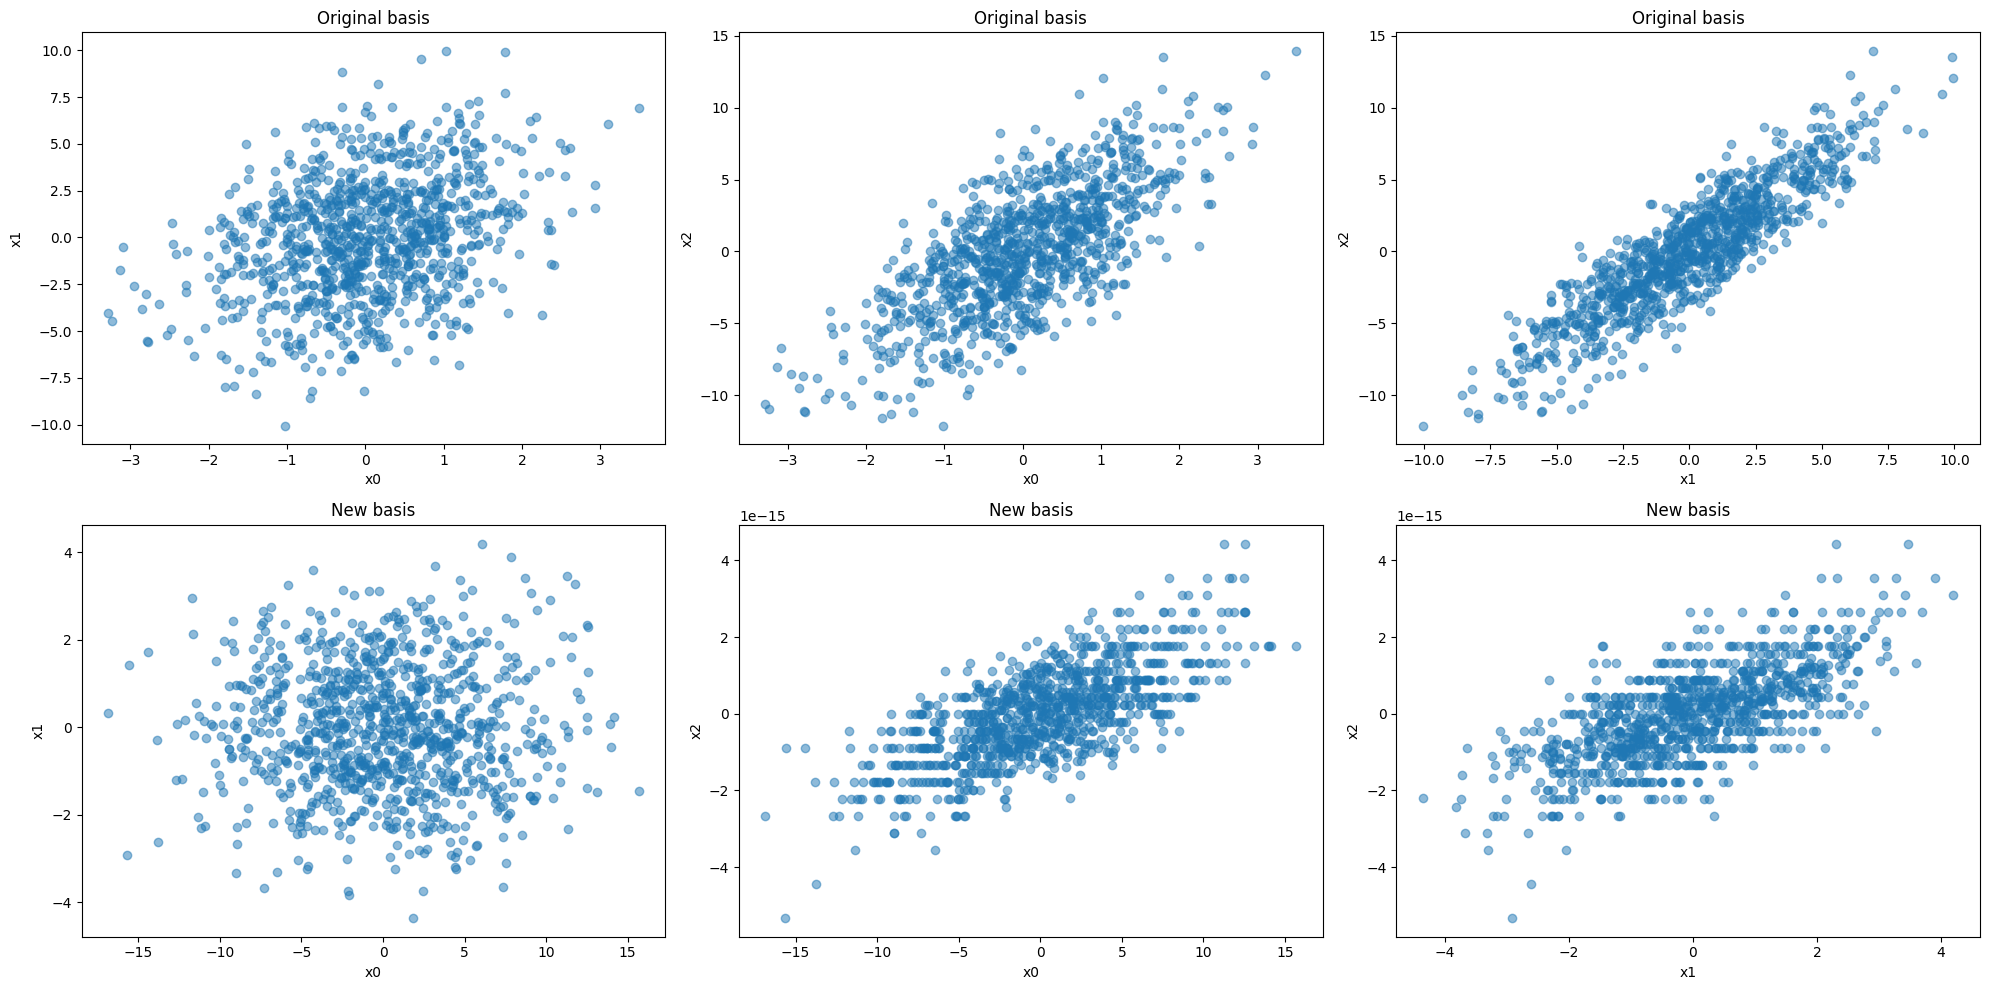

In [319]:
Xp = np.dot(X, Vt.T)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

ax[0,0].scatter(X[:,0],X[:,1],alpha=0.5)
ax[0,1].scatter(X[:,0],X[:,2],alpha=0.5)
ax[0,2].scatter(X[:,1],X[:,2],alpha=0.5)


ax[1,0].scatter(Xp[:,0],Xp[:,1],alpha=0.5)
ax[1,1].scatter(Xp[:,0],Xp[:,2],alpha=0.5)
ax[1,2].scatter(Xp[:,1],Xp[:,2],alpha=0.5)

for i in range(3):
    ax[0,i].set_title("Original basis")
    ax[1,i].set_title("New basis")

for i in range(2):
    ax[i,0].set_xlabel("x0")
    ax[i,0].set_ylabel("x1")
    
    ax[i,1].set_xlabel("x0")
    ax[i,1].set_ylabel("x2")

    ax[i,2].set_xlabel("x1")
    ax[i,2].set_ylabel("x2")

fig.tight_layout()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 